In [79]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook as tqdm
from sklearn.externals import joblib
%matplotlib inline
import seaborn as sns

In [80]:
DIR = 'PATH/TO/YOUR/DATA'
description = pd.read_csv(('HomeCredit_columns_description.csv'),encoding = 'latin1')
application = pd.read_csv('application_train.csv')
previous_application = pd.read_csv('previous_application.csv')

In [81]:
previous_application.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [82]:
PREVIOUS_APPLICATION_AGGREGATION_RECIPIES = []
for agg in ['mean', 'min', 'max', 'sum', 'var']:
    for select in ['AMT_ANNUITY',
                   'AMT_APPLICATION',
                   'AMT_CREDIT',
                   'AMT_DOWN_PAYMENT',
                   'AMT_GOODS_PRICE',
                   'CNT_PAYMENT',
                   'DAYS_DECISION',
                   'HOUR_APPR_PROCESS_START',
                   'RATE_DOWN_PAYMENT'
                   ]:
        PREVIOUS_APPLICATION_AGGREGATION_RECIPIES.append((select, agg))
PREVIOUS_APPLICATION_AGGREGATION_RECIPIES = [(['SK_ID_CURR'], PREVIOUS_APPLICATION_AGGREGATION_RECIPIES)]

In [83]:
groupby_aggregate_names = []
for groupby_cols, specs in tqdm(PREVIOUS_APPLICATION_AGGREGATION_RECIPIES):
    group_object = previous_application.groupby(groupby_cols)
    for select, agg in tqdm(specs):
        groupby_aggregate_name = '{}_{}_{}'.format('_'.join(groupby_cols), agg, select)
        application = application.merge(group_object[select]
                              .agg(agg)
                              .reset_index()
                              .rename(index=str,
                                      columns={select: groupby_aggregate_name})
                              [groupby_cols + [groupby_aggregate_name]],
                              on=groupby_cols,
                              how='left')
        groupby_aggregate_names.append(groupby_aggregate_name)

In [84]:
application.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,SK_ID_CURR_sum_RATE_DOWN_PAYMENT,SK_ID_CURR_var_AMT_ANNUITY,SK_ID_CURR_var_AMT_APPLICATION,SK_ID_CURR_var_AMT_CREDIT,SK_ID_CURR_var_AMT_DOWN_PAYMENT,SK_ID_CURR_var_AMT_GOODS_PRICE,SK_ID_CURR_var_CNT_PAYMENT,SK_ID_CURR_var_DAYS_DECISION,SK_ID_CURR_var_HOUR_APPR_PROCESS_START,SK_ID_CURR_var_RATE_DOWN_PAYMENT
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0.100061,2.146706e+09,1.799131e+11,2.479541e+11,2.370161e+07,1.799131e+11,12.000000,806653.000000,6.333333,0.005006
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0.212008,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0.326824,1.856019e+08,8.189620e+10,1.111138e+11,2.066837e+09,6.434877e+10,409.200000,24723.277778,1.000000,0.005923
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0.319033,6.502143e+07,1.011754e+10,1.393165e+10,1.633061e+05,1.011754e+10,205.866667,514474.166667,6.266667,0.007050


In [85]:

application_agg = application[groupby_aggregate_names + ['TARGET']]
application_agg_corr = abs(application_agg.corr())

In [86]:
application_agg_corr.sort_values('TARGET', ascending=False)['TARGET']

TARGET                                     1.000000
SK_ID_CURR_min_DAYS_DECISION               0.053434
SK_ID_CURR_var_DAYS_DECISION               0.048513
SK_ID_CURR_mean_DAYS_DECISION              0.046864
SK_ID_CURR_var_CNT_PAYMENT                 0.041960
SK_ID_CURR_sum_RATE_DOWN_PAYMENT           0.041693
SK_ID_CURR_max_RATE_DOWN_PAYMENT           0.040096
SK_ID_CURR_mean_HOUR_APPR_PROCESS_START    0.035927
SK_ID_CURR_mean_AMT_ANNUITY                0.034871
SK_ID_CURR_mean_RATE_DOWN_PAYMENT          0.033601
SK_ID_CURR_min_AMT_ANNUITY                 0.032249
SK_ID_CURR_min_HOUR_APPR_PROCESS_START     0.031427
SK_ID_CURR_max_HOUR_APPR_PROCESS_START     0.030847
SK_ID_CURR_max_CNT_PAYMENT                 0.029439
SK_ID_CURR_max_AMT_ANNUITY                 0.028966
SK_ID_CURR_mean_CNT_PAYMENT                0.027743
SK_ID_CURR_sum_CNT_PAYMENT                 0.027716
SK_ID_CURR_sum_AMT_DOWN_PAYMENT            0.026995
SK_ID_CURR_max_AMT_DOWN_PAYMENT            0.025290
SK_ID_CURR_m

In [87]:

numbers_of_applications = [1, 3, 5]

In [88]:
features = pd.DataFrame({'SK_ID_CURR': previous_application['SK_ID_CURR'].unique()})
prev_applications_sorted = previous_application.sort_values(['SK_ID_CURR', 'DAYS_DECISION'])

In [89]:
prev_applications_sorted.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
201668,1369693,100001,Consumer loans,3951.000,24835.5,23787.0,2520.0,24835.5,FRIDAY,13,...,Connectivity,8.0,high,POS mobile with interest,365243.0,-1709.0,-1499.0,-1619.0,-1612.0,0.0
892077,1038818,100002,Consumer loans,9251.775,179055.0,179055.0,0.0,179055.0,SATURDAY,9,...,Auto technology,24.0,low_normal,POS other with interest,365243.0,-565.0,125.0,-25.0,-17.0,0.0
1223745,2396755,100003,Consumer loans,6737.310,68809.5,68053.5,6885.0,68809.5,SATURDAY,15,...,Consumer electronics,12.0,middle,POS household with interest,365243.0,-2310.0,-1980.0,-1980.0,-1976.0,1.0
1021650,2636178,100003,Consumer loans,64567.665,337500.0,348637.5,0.0,337500.0,SUNDAY,17,...,Furniture,6.0,middle,POS industry with interest,365243.0,-797.0,-647.0,-647.0,-639.0,0.0
575941,1810518,100003,Cash loans,98356.995,900000.0,1035882.0,NaN,900000.0,FRIDAY,12,...,XNA,12.0,low_normal,Cash X-Sell: low,365243.0,-716.0,-386.0,-536.0,-527.0,1.0


In [90]:
group_object.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN
5,1383531,199383,Cash loans,23703.930,315000.0,340573.5,NaN,315000.0,SATURDAY,8,...,XNA,18.0,low_normal,Cash X-Sell: low,365243.0,-654.0,-144.0,-144.0,-137.0,1.0
6,2315218,175704,Cash loans,NaN,0.0,0.0,NaN,NaN,TUESDAY,11,...,XNA,NaN,XNA,Cash,NaN,NaN,NaN,NaN,NaN,NaN
7,1656711,296299,Cash loans,NaN,0.0,0.0,NaN,NaN,MONDAY,7,...,XNA,NaN,XNA,Cash,NaN,NaN,NaN,NaN,NaN,NaN
8,2367563,342292,Cash loans,NaN,0.0,0.0,NaN,NaN,MONDAY,15,...,XNA,NaN,XNA,Cash,NaN,NaN,NaN,NaN,NaN,NaN
9,2579447,334349,Cash loans,NaN,0.0,0.0,NaN,NaN,SATURDAY,15,...,XNA,NaN,XNA,Cash,NaN,NaN,NaN,NaN,NaN,NaN


In [91]:
group_object = prev_applications_sorted.groupby(by=['SK_ID_CURR'])['SK_ID_PREV'].nunique().reset_index()
group_object.rename(index=str,
                    columns={'SK_ID_PREV': 'previous_application_number_of_prev_application'},
                    inplace=True)
features = features.merge(group_object, on=['SK_ID_CURR'], how='left')

In [92]:
group_object.head()

,SK_ID_CURR,previous_application_number_of_prev_application
0,100001,1
1,100002,1
2,100003,3
3,100004,1
4,100005,2


In [93]:
prev_applications_sorted['previous_application_prev_was_approved'] = (
        prev_applications_sorted['NAME_CONTRACT_STATUS'] == 'Approved').astype('int')
group_object = prev_applications_sorted.groupby(by=['SK_ID_CURR'])[
    'previous_application_prev_was_approved'].last().reset_index()
features = features.merge(group_object, on=['SK_ID_CURR'], how='left')

In [94]:
prev_applications_sorted['previous_application_prev_was_refused'] = (
        prev_applications_sorted['NAME_CONTRACT_STATUS'] == 'Refused').astype('int')
group_object = prev_applications_sorted.groupby(by=['SK_ID_CURR'])[
    'previous_application_prev_was_refused'].last().reset_index()
features = features.merge(group_object, on=['SK_ID_CURR'], how='left')

In [95]:
for number in numbers_of_applications:
    prev_applications_tail = prev_applications_sorted.groupby(by=['SK_ID_CURR']).tail(number)

    group_object = prev_applications_tail.groupby(by=['SK_ID_CURR'])['CNT_PAYMENT'].mean().reset_index()
    group_object.rename(index=str, columns={
        'CNT_PAYMENT': 'previous_application_term_of_last_{}_credits_mean'.format(number)},
                        inplace=True)
    features = features.merge(group_object, on=['SK_ID_CURR'], how='left')

    group_object = prev_applications_tail.groupby(by=['SK_ID_CURR'])['DAYS_DECISION'].mean().reset_index()
    group_object.rename(index=str, columns={
        'DAYS_DECISION': 'previous_application_days_decision_about_last_{}_credits_mean'.format(number)},
                        inplace=True)
    features = features.merge(group_object, on=['SK_ID_CURR'], how='left')

    group_object = prev_applications_tail.groupby(by=['SK_ID_CURR'])['DAYS_FIRST_DRAWING'].mean().reset_index()
    group_object.rename(index=str, columns={
        'DAYS_FIRST_DRAWING': 'previous_application_days_first_drawing_last_{}_credits_mean'.format(number)},
                        inplace=True)
    features = features.merge(group_object, on=['SK_ID_CURR'], how='left')

In [96]:
features.head()

,SK_ID_CURR,previous_application_number_of_prev_application,previous_application_prev_was_approved,previous_application_prev_was_refused,previous_application_term_of_last_1_credits_mean,previous_application_days_decision_about_last_1_credits_mean,previous_application_days_first_drawing_last_1_credits_mean,previous_application_term_of_last_3_credits_mean,previous_application_days_decision_about_last_3_credits_mean,previous_application_days_first_drawing_last_3_credits_mean,previous_application_term_of_last_5_credits_mean,previous_application_days_decision_about_last_5_credits_mean,previous_application_days_first_drawing_last_5_credits_mean
0,271877,3,1,0,12.0,-73,365243.0,20.0,-364.333333,365243.0,20.0,-364.333333,365243.000000
1,108129,6,1,0,36.0,-164,365243.0,26.0,-432.666667,365243.0,16.4,-614.800000,292051.800000
2,122040,4,0,0,NaN,-301,NaN,6.0,-1002.333333,181419.0,8.0,-1395.750000,242693.666667
3,176158,23,0,0,NaN,-218,NaN,36.0,-218.000000,NaN,22.0,-306.800000,365243.000000
4,202054,25,0,1,36.0,-7,NaN,36.0,-15.000000,NaN,36.0,-22.000000,NaN


In [97]:
X = application.merge(features,
                                left_on=['SK_ID_CURR'],
                                right_on=['SK_ID_CURR'],
                                how='left',
                                validate='one_to_one')

In [98]:
engineered_numerical_columns = list(features.columns)
engineered_numerical_columns.remove('SK_ID_CURR')
credit_eng = X[engineered_numerical_columns + ['TARGET']]
credit_eng_corr = abs(credit_eng.corr())

In [99]:
credit_eng_corr.sort_values('TARGET', ascending=False)['TARGET']

TARGET                                                          1.000000
previous_application_prev_was_refused                           0.056848
previous_application_days_first_drawing_last_5_credits_mean     0.050464
previous_application_days_first_drawing_last_3_credits_mean     0.048791
previous_application_days_decision_about_last_5_credits_mean    0.042162
previous_application_days_first_drawing_last_1_credits_mean     0.038439
previous_application_prev_was_approved                          0.036611
previous_application_days_decision_about_last_3_credits_mean    0.033704
previous_application_term_of_last_5_credits_mean                0.027091
previous_application_term_of_last_3_credits_mean                0.021879
previous_application_number_of_prev_application                 0.019762
previous_application_days_decision_about_last_1_credits_mean    0.016399
previous_application_term_of_last_1_credits_mean                0.013643
Name: TARGET, dtype: float64

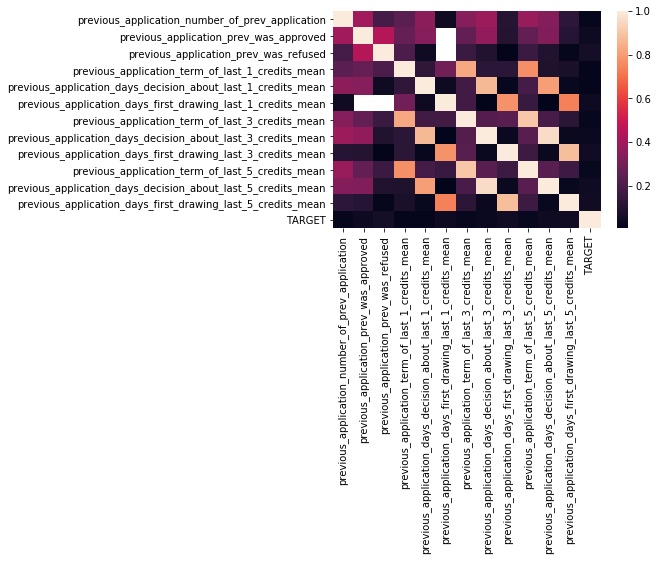

In [100]:
sns.heatmap(credit_eng_corr, 
            xticklabels=credit_eng_corr.columns,
            yticklabels=credit_eng_corr.columns)

In [101]:

features = pd.DataFrame({'SK_ID_CURR': previous_application['SK_ID_CURR'].unique()})
prev_app_sorted = previous_application.sort_values(['SK_ID_CURR', 'DAYS_DECISION'])

In [102]:
features.shape

(338857, 1)

In [103]:
prev_app_sorted.shape

(1670214, 37)

In [104]:
prev_app_sorted['approved'] = (prev_app_sorted['NAME_CONTRACT_STATUS'] == 'Approved').astype('int')
prev_app_sorted['refused'] = (prev_app_sorted['NAME_CONTRACT_STATUS'] == 'Refused').astype('int')
prev_app_sorted['revolving_loan'] = (prev_app_sorted['NAME_CONTRACT_TYPE'] == 'Revolving loans').astype('int')
prev_app_sorted['cash_loan'] = (prev_app_sorted['NAME_CONTRACT_TYPE'] == 'Cash loans').astype('int')
prev_app_sorted['consumer_loan'] = (prev_app_sorted['NAME_CONTRACT_TYPE'] == 'Consumer loans').astype('int')
prev_app_sorted['credit_goods_diff'] = prev_app_sorted['AMT_CREDIT'] - prev_app_sorted['AMT_GOODS_PRICE']
prev_app_sorted['credit_goods_ratio'] = prev_app_sorted['AMT_CREDIT'] / prev_app_sorted['AMT_GOODS_PRICE']
prev_app_sorted['application_credit_diff'] = prev_app_sorted['AMT_APPLICATION'] - prev_app_sorted['AMT_CREDIT']
prev_app_sorted['application_credit_ratio'] = prev_app_sorted['AMT_APPLICATION'] / prev_app_sorted['AMT_CREDIT']
prev_app_sorted['NAME_PRODUCT_TYPE_x_sell'] = (prev_app_sorted['NAME_PRODUCT_TYPE'] == 'x-sell').astype('int')
prev_app_sorted['NAME_PRODUCT_TYPE_walk_in'] = (prev_app_sorted['NAME_PRODUCT_TYPE'] == 'walk-in').astype('int')
prev_app_sorted['NAME_PAYMENT_TYPE_bank'] = (prev_app_sorted['NAME_PAYMENT_TYPE'] == 'Cash through the bank').astype('int')
prev_app_sorted['NAME_PAYMENT_TYPE_account'] = (prev_app_sorted['NAME_PAYMENT_TYPE'] == 'Non-cash from your account').astype('int')
prev_app_sorted['NAME_PAYMENT_TYPE_employer'] = (prev_app_sorted['NAME_PAYMENT_TYPE'] == 'Cashless from the account of the employer').astype('int')

In [105]:
prev_app_sorted.shape

(1670214, 51)

In [106]:
prev_app_sorted_groupby = prev_app_sorted.groupby(by=['SK_ID_CURR'])

In [107]:
prev_app_sorted_groupby.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,consumer_loan,credit_goods_diff,credit_goods_ratio,application_credit_diff,application_credit_ratio,NAME_PRODUCT_TYPE_x_sell,NAME_PRODUCT_TYPE_walk_in,NAME_PAYMENT_TYPE_bank,NAME_PAYMENT_TYPE_account,NAME_PAYMENT_TYPE_employer
201668,1369693,100001,Consumer loans,3951.000,24835.50,23787.0,2520.00,24835.50,FRIDAY,13,...,1,-1048.50,0.957782,1048.50,1.044079,0,0,1,0,0
892077,1038818,100002,Consumer loans,9251.775,179055.00,179055.0,0.00,179055.00,SATURDAY,9,...,1,0.00,1.000000,0.00,1.000000,0,0,0,0,0
1223745,2396755,100003,Consumer loans,6737.310,68809.50,68053.5,6885.00,68809.50,SATURDAY,15,...,1,-756.00,0.989013,756.00,1.011109,0,0,1,0,0
1021650,2636178,100003,Consumer loans,64567.665,337500.00,348637.5,0.00,337500.00,SUNDAY,17,...,1,11137.50,1.033000,-11137.50,0.968054,0,0,1,0,0
575941,1810518,100003,Cash loans,98356.995,900000.00,1035882.0,NaN,900000.00,FRIDAY,12,...,0,135882.00,1.150980,-135882.00,0.868825,1,0,0,0,0
935548,1564014,100004,Consumer loans,5357.250,24282.00,20106.0,4860.00,24282.00,FRIDAY,5,...,1,-4176.00,0.828021,4176.00,1.207699,0,0,1,0,0
1378978,2495675,100005,Consumer loans,4813.200,44617.50,40153.5,4464.00,44617.50,THURSDAY,11,...,1,-4464.00,0.899950,4464.00,1.111173,0,0,1,0,0
1259112,1857999,100005,Cash loans,NaN,0.00,0.0,NaN,NaN,FRIDAY,10,...,0,NaN,NaN,0.00,NaN,0,0,0,0,0
1333657,2299329,100006,Consumer loans,2482.920,26912.34,24219.0,2693.34,26912.34,TUESDAY,15,...,1,-2693.34,0.899922,2693.34,1.111208,0,0,0,0,0
1131133,1020698,100006,Cash loans,39954.510,454500.00,481495.5,NaN,454500.00,SATURDAY,12,...,0,26995.50,1.059396,-26995.50,0.943934,1,0,1,0,0


In [108]:
g = prev_app_sorted_groupby['SK_ID_PREV'].agg('nunique').reset_index()
g.rename(index=str, columns={'SK_ID_PREV': 'previous_application_number_of_prev_application'}, inplace=True)
features = features.merge(g, on=['SK_ID_CURR'], how='left')

In [109]:
g.head()

,SK_ID_CURR,previous_application_number_of_prev_application
0,100001,1
1,100002,1
2,100003,3
3,100004,1
4,100005,2


In [110]:
g = prev_app_sorted_groupby['refused'].mean().reset_index()
g.rename(index=str, columns={'refused': 'previous_application_fraction_of_refused_applications'}, inplace=True)
features = features.merge(g, on=['SK_ID_CURR'], how='left')
features.head()

,SK_ID_CURR,previous_application_number_of_prev_application,previous_application_fraction_of_refused_applications
0,271877,3,0.333333
1,108129,6,0.000000
2,122040,4,0.000000
3,176158,23,0.652174
4,202054,25,0.520000


In [111]:
prev_app_sorted.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,consumer_loan,credit_goods_diff,credit_goods_ratio,application_credit_diff,application_credit_ratio,NAME_PRODUCT_TYPE_x_sell,NAME_PRODUCT_TYPE_walk_in,NAME_PAYMENT_TYPE_bank,NAME_PAYMENT_TYPE_account,NAME_PAYMENT_TYPE_employer
201668,1369693,100001,Consumer loans,3951.000,24835.5,23787.0,2520.0,24835.5,FRIDAY,13,...,1,-1048.5,0.957782,1048.5,1.044079,0,0,1,0,0
892077,1038818,100002,Consumer loans,9251.775,179055.0,179055.0,0.0,179055.0,SATURDAY,9,...,1,0.0,1.000000,0.0,1.000000,0,0,0,0,0
1223745,2396755,100003,Consumer loans,6737.310,68809.5,68053.5,6885.0,68809.5,SATURDAY,15,...,1,-756.0,0.989013,756.0,1.011109,0,0,1,0,0
1021650,2636178,100003,Consumer loans,64567.665,337500.0,348637.5,0.0,337500.0,SUNDAY,17,...,1,11137.5,1.033000,-11137.5,0.968054,0,0,1,0,0
575941,1810518,100003,Cash loans,98356.995,900000.0,1035882.0,NaN,900000.0,FRIDAY,12,...,0,135882.0,1.150980,-135882.0,0.868825,1,0,0,0,0


In [112]:
def _get_last_k_applications_feature_name(feature_name, number, suffix):
    return 'previous_application_{}_last_{}_applications_{}'.format(feature_name, number, suffix)


def get_last_k_credits_features(prev_app_sorted, numbers_of_applications):
    features = pd.DataFrame({'SK_ID_CURR': prev_app_sorted['SK_ID_CURR'].unique()})

    feature_list = ['CNT_PAYMENT', 'DAYS_DECISION', 'DAYS_FIRST_DRAWING', 'NFLAG_INSURED_ON_APPROVAL',
                        'NAME_PRODUCT_TYPE_x_sell', 'NAME_PRODUCT_TYPE_walk_in', 'NAME_PAYMENT_TYPE_bank',
                        'NAME_PAYMENT_TYPE_account', 'NAME_PAYMENT_TYPE_employer', 'approved', 'refused',
                        'revolving_loan', 'cash_loan', 'consumer_loan', 'credit_goods_diff', 'credit_goods_ratio',
                        'application_credit_diff', 'application_credit_ratio']

    for number in numbers_of_applications:
        prev_applications_tail = prev_app_sorted.groupby('SK_ID_CURR').tail(number)
        tail_groupby = prev_applications_tail.groupby('SK_ID_CURR')
        g = tail_groupby[feature_list].agg('mean')

        g = g.rename(axis='columns', mapper=partial(_get_last_k_applications_feature_name,
                                                        number=number, suffix='mean')).reset_index()
        features = features.merge(g, how='left', on='SK_ID_CURR')

    return features

In [113]:
from functools import partial

g = get_last_k_credits_features(prev_app_sorted, numbers_of_applications=numbers_of_applications)
features = features.merge(g, on=['SK_ID_CURR'], how='left')
features.head()

,SK_ID_CURR,previous_application_number_of_prev_application,previous_application_fraction_of_refused_applications,previous_application_CNT_PAYMENT_last_1_applications_mean,previous_application_DAYS_DECISION_last_1_applications_mean,previous_application_DAYS_FIRST_DRAWING_last_1_applications_mean,previous_application_NFLAG_INSURED_ON_APPROVAL_last_1_applications_mean,previous_application_NAME_PRODUCT_TYPE_x_sell_last_1_applications_mean,previous_application_NAME_PRODUCT_TYPE_walk_in_last_1_applications_mean,previous_application_NAME_PAYMENT_TYPE_bank_last_1_applications_mean,...,previous_application_NAME_PAYMENT_TYPE_employer_last_5_applications_mean,previous_application_approved_last_5_applications_mean,previous_application_refused_last_5_applications_mean,previous_application_revolving_loan_last_5_applications_mean,previous_application_cash_loan_last_5_applications_mean,previous_application_consumer_loan_last_5_applications_mean,previous_application_credit_goods_diff_last_5_applications_mean,previous_application_credit_goods_ratio_last_5_applications_mean,previous_application_application_credit_diff_last_5_applications_mean,previous_application_application_credit_ratio_last_5_applications_mean
0,271877,3,0.333333,12.0,-73,365243.0,0.0,0,0,1,...,0.0,0.666667,0.333333,0.00,0.0,1.00,-11277.00,1.026818,11277.000,0.976761
1,108129,6,0.000000,36.0,-164,365243.0,1.0,1,0,0,...,0.0,1.000000,0.000000,0.20,0.4,0.40,27744.75,0.939683,-67195.800,0.953353
2,122040,4,0.000000,NaN,-301,NaN,NaN,0,0,0,...,0.0,0.750000,0.000000,0.25,0.5,0.25,8008.50,1.084044,-6006.375,0.932643
3,176158,23,0.652174,NaN,-218,NaN,NaN,0,0,0,...,0.0,0.200000,0.400000,0.00,1.0,0.00,35145.00,1.078760,-21087.000,0.928384
4,202054,25,0.520000,36.0,-7,NaN,NaN,1,0,1,...,0.0,0.000000,0.600000,0.00,1.0,0.00,107068.50,1.217800,-64241.100,0.822189


In [114]:
features.to_csv("df_eda-previous_application",index=False)

In [115]:

# X = application.merge(features,
#                                 left_on=['SK_ID_CURR'],
#                                 right_on=['SK_ID_CURR'],
#                                 how='left',
#                                 validate='one_to_one')

In [116]:
# engineered_numerical_columns = list(features.columns)
# engineered_numerical_columns.remove('SK_ID_CURR')
# credit_eng = X[engineered_numerical_columns + ['TARGET']]
# credit_eng_corr = abs(credit_eng.corr())

In [117]:
# credit_eng_corr.sort_values('TARGET', ascending=False)['TARGET']

In [118]:
# plt.figure(figsize=(15, 15))
# sns.heatmap(credit_eng_corr, 
#             xticklabels=credit_eng_corr.columns,
#             yticklabels=credit_eng_corr.columns)